In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
from skimage.io import imread

%matplotlib inline
from IPython.display import HTML, display

## 1. Edge detection

### 1.1 Gaussian smoothing


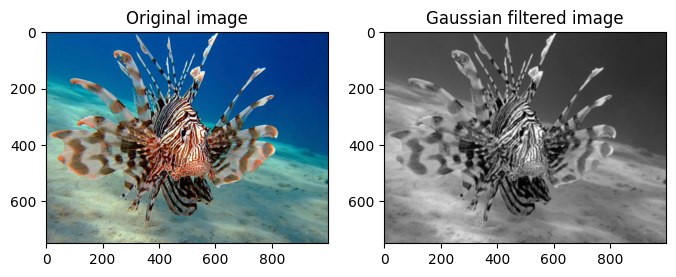

In [8]:
RGBimg = imread('lionfish.jpg')
img = img_as_float(color.rgb2gray(RGBimg))

sigma = np.sqrt(2)
img_smooth = filters.gaussian(img, sigma)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(img_smooth, cmap=cm.gist_gray)
plt.title('Gaussian filtered image');

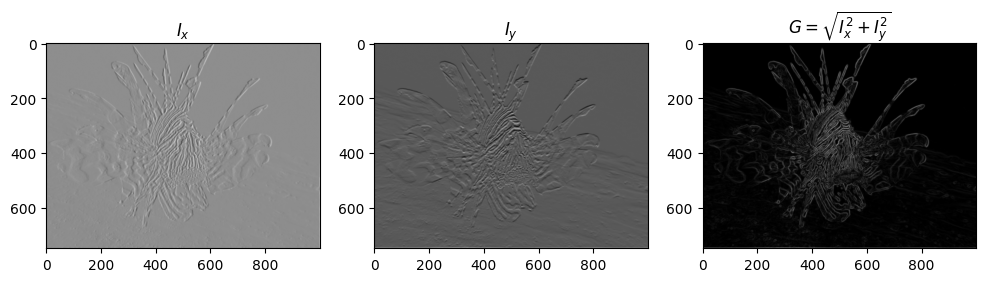

In [9]:
# Partial derivatives kernel
k = np.array([-0.5, 0, 0.5])

# Compute first derivative along x
Ix = np.zeros_like(img)
for i, r in enumerate(img_smooth):
        Ix[i, :] = signal.convolve(r, k, mode='same')

# Compute first derivative along y
Iy = np.zeros_like(img)
for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

# Compute the mangnitude of the gradient
G = np.sqrt(Ix**2 + Iy**2)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(Ix, cmap=cm.gist_gray)
plt.title(r'$I_x$')
plt.subplot(132)
plt.imshow(Iy, cmap=cm.gist_gray)
plt.title(r'$I_y$')
plt.subplot(133)
plt.imshow(G, cmap=cm.gist_gray)
plt.title(r'$G = \sqrt{I_x^2+I_y^2}$')
plt.tight_layout;

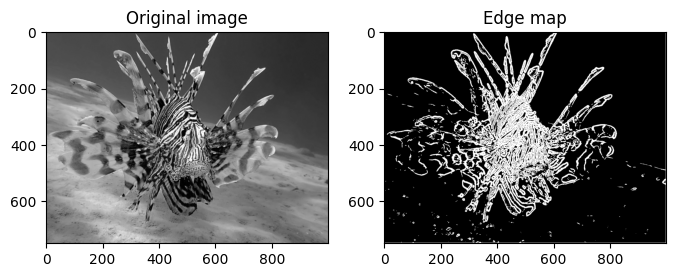

In [10]:
threshold = 0.03
edge = np.where(G > threshold, 1, 0)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');

In [11]:
def edge_detector(img, sigma, threshold):
    """Perform edge detection on an input RGB image.
    
    - img: (n, m) input RGB image
    - sigma: float, standard deviation of the Gaussian smoothing
    - threshold: float, threshold value for the gradient
    """
    # Convert to grayscale and convert the image to float
    _img = img_as_float(color.rgb2gray(img))
    
    # Apply Gaussian filter
    img_smooth = filters.gaussian(_img, sigma)
    
    # Compute first derivatives with the following kernel
    k = np.array([-0.5, 0, 0.5])

    # Compute first derivative along x
    Ix = np.zeros(img_smooth.shape)
    for i, r in enumerate(img_smooth):
        
        Ix[i, :] = signal.convolve(r, k, mode='same')

    # Compute first derivative along y
    Iy = np.zeros(img_smooth.shape)
    for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

    # Compute the mangnitude of the gradient
    G = np.sqrt(Ix**2 + Iy**2)
    
    # Generate edge map
    edge = np.where(G > threshold, 255, 0)
    
    return edge

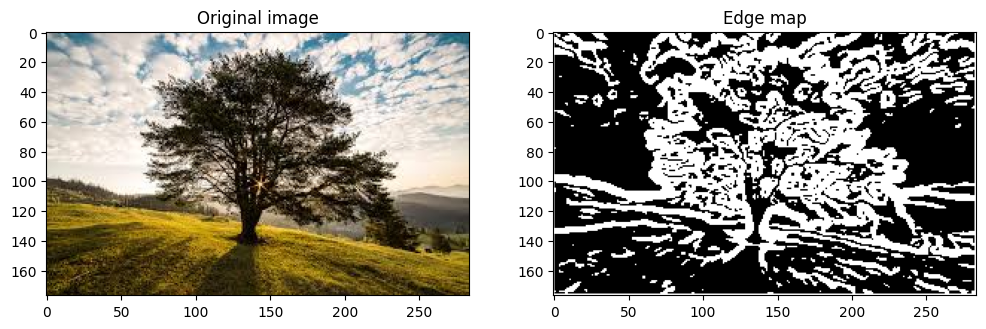

In [13]:
# Run some edge detection
RGBimg = imread('tree.jpeg')
edge = edge_detector(RGBimg, np.sqrt(2), 0.03)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');

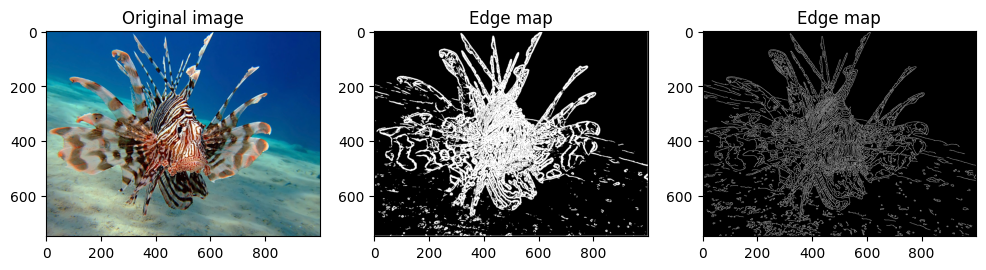

In [14]:
# Run some edge detection
RGBimg = imread('lionfish.jpg')
edge = edge_detector(RGBimg, np.sqrt(2), 0.02)
edge_canny = feature.canny(color.rgb2gray(RGBimg))

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map')
plt.subplot(133)
plt.imshow(edge_canny, cmap=cm.gist_gray)
plt.title('Edge map');

## 2. Corner detection

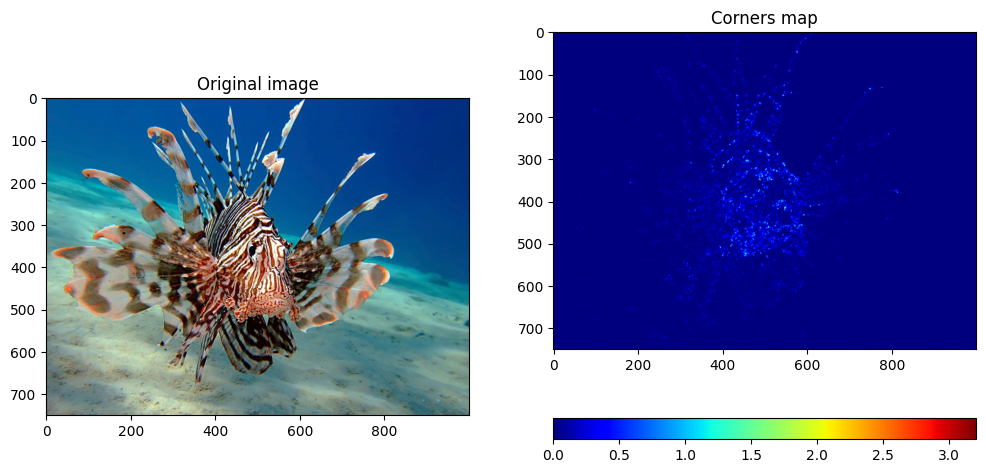

In [16]:
RGBimg = imread('lionfish.jpg')
corners_map = feature.corner_shi_tomasi(color.rgb2gray(RGBimg))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(corners_map, cmap=cm.jet)
plt.colorbar(orientation='horizontal')
plt.title('Corners map');

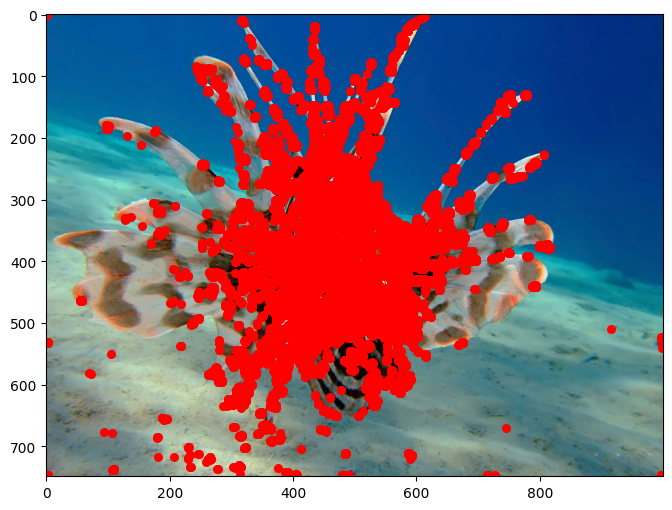

In [17]:
threshold = 0.1
naive_corners = np.where(corners_map > threshold)

plt.figure(figsize=(12,6))
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=30, c='r');

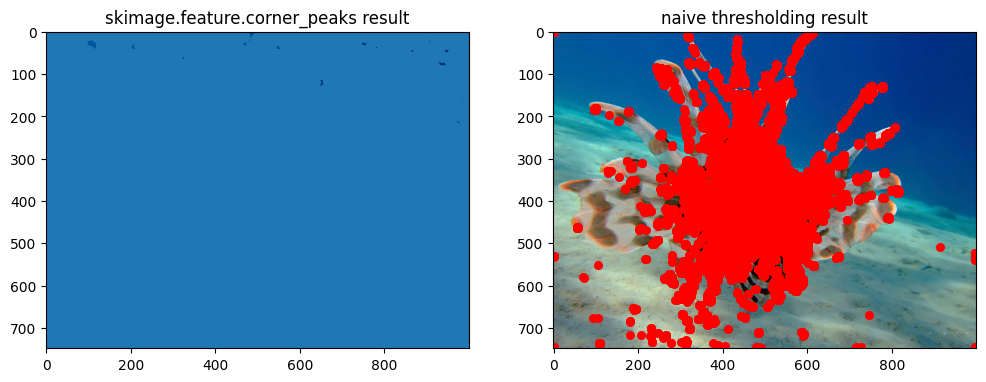

In [18]:
corners = feature.corner_peaks(feature.corner_shi_tomasi(color.rgb2gray(RGBimg)))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(corners[:,1], corners[:,0], s=30)
plt.title('skimage.feature.corner_peaks result')

plt.subplot(122)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=30, c='r')
plt.title('naive thresholding result');

In [19]:
RGBimg = imread('tree.jpeg')

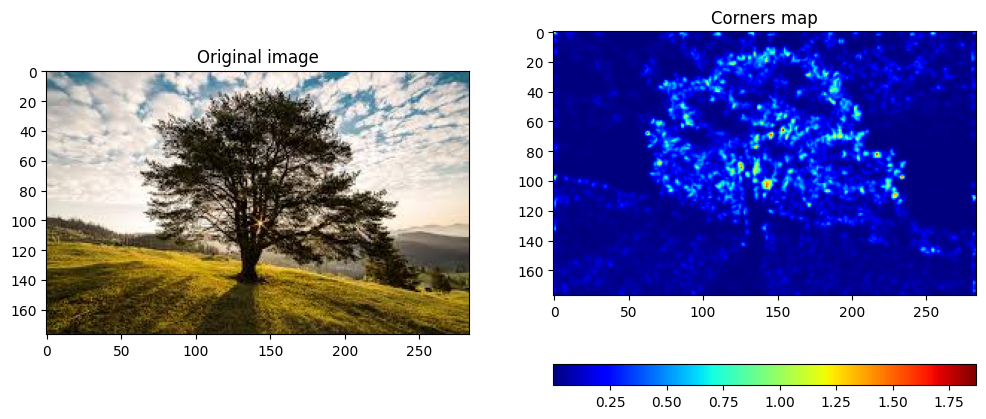

In [22]:
corners_map = feature.corner_shi_tomasi(color.rgb2gray(RGBimg))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(corners_map, cmap=cm.jet)
plt.colorbar(orientation='horizontal')
plt.title('Corners map');

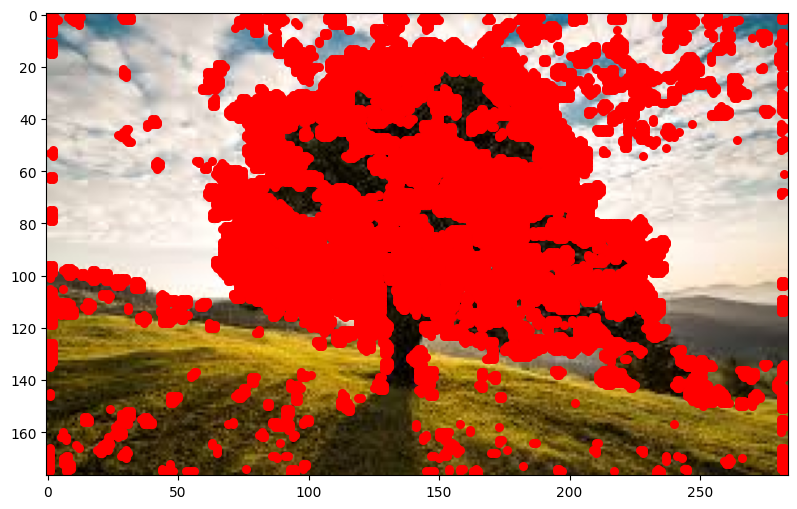

In [23]:
threshold = 0.1
naive_corners = np.where(corners_map > threshold)

plt.figure(figsize=(12,6))
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=30, c='r');

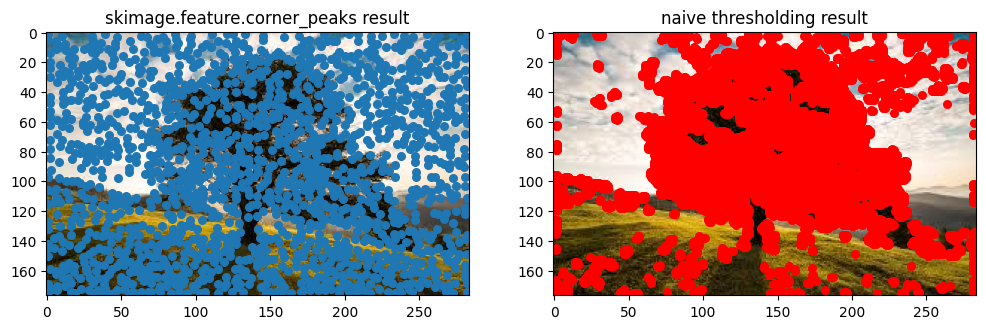

In [24]:
corners = feature.corner_peaks(feature.corner_shi_tomasi(color.rgb2gray(RGBimg)))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(corners[:,1], corners[:,0], s=30)
plt.title('skimage.feature.corner_peaks result')

plt.subplot(122)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=30, c='r')
plt.title('naive thresholding result');